In [1]:
import pandas

import os, fnmatch
from shutil import copyfile

def find(pattern, img_path, flag=False):
    result = []
    for root, dirs, files in os.walk(img_path):
        for name in files:
            if fnmatch.fnmatch(name, pattern):
                if flag:
                    result.append(name)
                else:
                    result.append(r'{}/{}'.format(img_path,name))
    return result


In [2]:
#images folder pathz
path=rf'C:\Users\eddyl_kayxd9j\OneDrive\Desktop\Personlized Preception Project'
result = find('*.jpg',path)

In [3]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from skimage.io import imshow, imread
from skimage.color import rgb2yuv, rgb2hsv, rgb2gray, yuv2rgb, hsv2rgb,rgb2gray
from scipy.signal import convolve2d
from skimage.transform import rotate, AffineTransform, warp
from skimage.util import random_noise
from skimage.filters import gaussian
import matplotlib.pyplot as plt

In [4]:
#soble
from scipy.ndimage import sobel

def sb(img):
    sx = sobel(img, axis=0, mode='constant')
    sy = sobel(img, axis=1, mode='constant')
    return np.hypot(sx, sy)

In [6]:
# img_dir: The direction of images. The aufmented images will be soted within same folder. 
def save_image_augmentation(img_dir):
    for i in img_dir:
        image = plt.imread(i)
        plt.imsave(i[:len(i)-4]+' rotated.jpg',rotate(image, angle=45, mode = 'wrap'))
        plt.imsave(i[:len(i)-4]+' fliplr.jpg',np.fliplr(image))
        plt.imsave(i[:len(i)-4]+' flipud.jpg',np.flipud(image))
        plt.imsave(i[:len(i)-4]+' random_noise.jpg',random_noise(image,var=0.2**2))
        plt.imsave(i[:len(i)-4]+' gaussian.jpg',(gaussian(image,sigma=2)* 255).astype(np.uint8))
        plt.imsave(i[:len(i)-4]+' sobel.jpg',sb(rgb2gray(image)))
    

In [ ]:
save_image_augmentation('The direction of your image folder')

In [7]:
augment_type=['original','rotation','filp_lr','flip_ud','random_noise','sobel','gaussian']
def augmentation(image_path):
    image=imread(image_path)
    augment_data=[]
    augment_data.append(image)
    augment_data.append(rotate(image, angle=45, mode = 'wrap'))
    augment_data.append(np.fliplr(image))
    augment_data.append(np.flipud(image))
    augment_data.append(random_noise(image,var=0.2**2))
    augment_data.append(sb(rgb2gray(image)))
    augment_data.append((gaussian(image,sigma=2)* 255).astype(np.uint8))
    return augment_data 

In [8]:
data=[]
augment_type=['original','rotation','filp_lr','flip_ud','random_noise','sobel','gaussian','sharpen']
d=augmentation(result[0])
for i in d:
    data.append(i)

In [9]:
print(len(data))

7


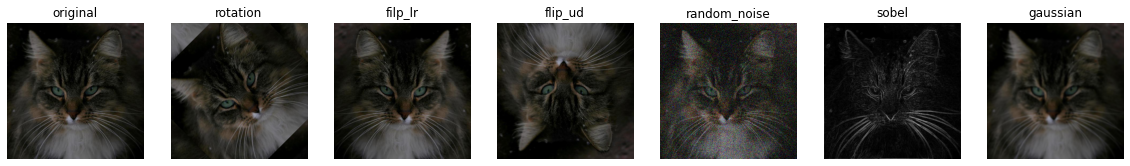

In [10]:
num_of_augmentation_type=7
fig,ax = plt.subplots(nrows=1,ncols=num_of_augmentation_type,figsize=(20,20))
title=['original','rotation','filp_lr','flip_ud','random_noise','sobel','gaussian','sharpen']
for i in range(num_of_augmentation_type):
    if title[i]=='sobel':
        ax[i].imshow(data[i],cmap='gray')
        ax[i].set_title(title[i])
        ax[i].axis('off')
    else:
        ax[i].imshow(data[i])
        ax[i].set_title(title[i])
        ax[i].axis('off')